### Project on Toxic Comments Classifier by Indika Debnath 


### Project Objectives:

Build a prediction model capable of detecting and assigning probabilities for different types of of toxicity such as: 
1. toxic
2. severe toxic
3. obscene
4. threat
5. insult
6. identity hate

## Import relevant libraries

In [ ]:
# Import relevant packages
import matplotlib.pyplot as plt
import nltk
import numpy as np
import re 
import pandas as pd
import string
import time
import seaborn as sns
from nltk.corpus import stopwords  # Remove useless words
from nltk.stem.lancaster import LancasterStemmer  # Convert words to base form; aggressive
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # Import packages that help us to create document-term matrix


In [ ]:
#Download the stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Stopwords are a list of 'useless' words
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

## Load the Dataset

In [ ]:
df = pd.read_csv('toxic_comments.csv')
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0.0,0.0,0.0,0.0,0.0,0.0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0.0,0.0,0.0,0.0,0.0,0.0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0.0,0.0,0.0,0.0,0.0,0.0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0.0,0.0,0.0,0.0,0.0,0.0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0.0,0.0,0.0,0.0,0.0,0.0


Comments--> Entries with all 0 under the 6 categories are neutral and considered as non-toxic

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111431 entries, 0 to 111430
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             111431 non-null  object 
 1   comment_text   111430 non-null  object 
 2   toxic          111430 non-null  float64
 3   severe_toxic   111430 non-null  float64
 4   obscene        111430 non-null  float64
 5   threat         111430 non-null  float64
 6   insult         111430 non-null  float64
 7   identity_hate  111430 non-null  float64
dtypes: float64(6), object(2)
memory usage: 6.8+ MB


Comments--> A clean dataset with no missing values

## Checking for first 3 comments

In [ ]:
df['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [ ]:
df['comment_text'][1]

"D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"

In [ ]:
df['comment_text'][3]

'"\nMore\nI can\'t make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It\'s listed in the relevant form eg Wikipedia:Good_article_nominations#Transport  "'

Comments-->The comments are dirty with '\n' values, symbols, numbers that will not be useful for analysis. We will be removing these further down the pipeline

## Exploratory Data Analysis

In [ ]:
# Check percentage of comments that are toxic compared to normal comments
df.toxic.value_counts(normalize=True)

0.0    0.903886
1.0    0.096114
Name: toxic, dtype: float64

Comments--> In this dataset, 90% of the comments fall in the toxic category

In [ ]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0.0,0.0,0.0,0.0,0.0,0.0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0.0,0.0,0.0,0.0,0.0,0.0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0.0,0.0,0.0,0.0,0.0,0.0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0.0,0.0,0.0,0.0,0.0,0.0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Create a new subset of the data by only taking the 2nd column onwards (comments and categories)
df_count=df.iloc[:,2:].sum()

In [ ]:
df_count

toxic            10710.0
severe_toxic      1101.0
obscene           5913.0
threat             342.0
insult            5511.0
identity_hate      954.0
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


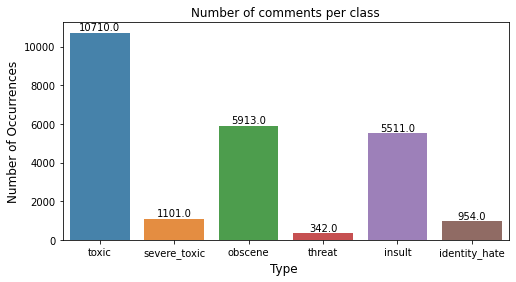

In [ ]:
# Plot a chart with the following size
plt.figure(figsize=(8,4))

# Plot a bar chart using the index (category values) and the count of each category. alpha = 0.9 to make the bars more translucent
ax = sns.barplot(df_count.index, df_count.values, alpha=0.9)

plt.title("Number of comments per class")
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)

#adding the text labels for each bar
rects = ax.patches
labels = df_count.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [ ]:
total_rows = len(df)
print(total_rows)

111431


9.61132898385548 0.9880553885364037 5.306422808733656 0.3069163877197548 4.94566144071219 0.8561351867972109


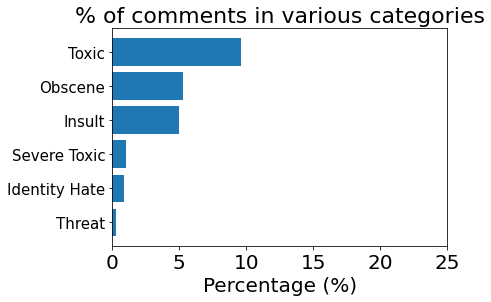

In [ ]:
# Create a bar graph 
sum_tox = df['toxic'].sum() / total_rows * 100
sum_sev = df['severe_toxic'].sum() / total_rows * 100
sum_obs = df['obscene'].sum() / total_rows * 100
sum_thr = df['threat'].sum() / total_rows * 100
sum_ins = df['insult'].sum() / total_rows * 100
sum_ide = df['identity_hate'].sum() / total_rows * 100

print(sum_tox,sum_sev,sum_obs,sum_thr,sum_ins,sum_ide)

# Initiate a list of 6 values that represent the 6 x-axis values for the categories
ind = np.arange(6)

# Let the ind variable be the x-axis, whereas the % of toxicity for each category be the y-axis.
# Sequence of % have been sorted manually. This method cannot be done if there are large numbers of categories.
ax = plt.barh(ind, [sum_tox, sum_obs, sum_ins, sum_sev, sum_ide, sum_thr])
plt.xlabel('Percentage (%)', size=20)
plt.xticks(np.arange(0, 30, 5), size=20)
plt.title('% of comments in various categories', size=22)
plt.yticks(ind, ('Toxic', 'Obscene', 'Insult', 'Severe Toxic', 'Identity Hate', 'Threat', ), size=15)

# Invert the graph so that it is in descending order.
plt.gca().invert_yaxis()
plt.show()


## Preprocess the text

In [ ]:
# remove all numbers with letters attached to them
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)

# '[%s]' % re.escape(string.punctuation),' ' - replace punctuation with white space
# .lower() - convert all strings to lowercase 
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

# Remove all '\n' in the string and replace it with a space
remove_n = lambda x: re.sub("\n", " ", x)

# Remove all non-ascii characters 
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)

# Apply all the lambda functions wrote previously through .map on the comments column
df['comment_text'] = df['comment_text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

df['comment_text'][0]

TypeError: ignored

## Separate our dataset into 6 sections. Each section is comment + 1 category.

In [ ]:
df_tox = df.loc[:,['id','comment_text','toxic']]

In [ ]:
df_tox['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [ ]:
df_tox['comment_text'][1]

"D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"

In [ ]:
df_sev = df.loc[:,['id','comment_text','severe_toxic']]

In [ ]:
df_obs = df.loc[:,['id','comment_text','obscene']]

In [ ]:
df_thr = df.loc[:,['id','comment_text','threat']]

In [ ]:
df_ins = df.loc[:,['id','comment_text','insult']]

In [ ]:
df_ide = df.loc[:,['id','comment_text','identity_hate']]

## Creating WordCloud
### Useful to show the words which occur most frequently for each category. Warning: Profanity ahead.

In [ ]:
import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

In [ ]:
def wordcloud(df, label):
    
    # Print only rows where the toxic category label value is 1 (ie. the comment is toxic)
    subset=df[df[label]==1]
    text=subset.comment_text.values
    wc= WordCloud(background_color="white",max_words=4000)

    wc.generate(" ".join(text))

    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

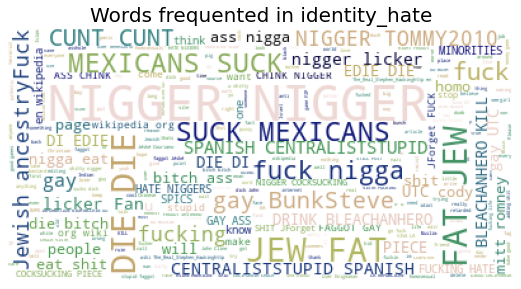

In [ ]:
wordcloud(df_ide,'identity_hate')

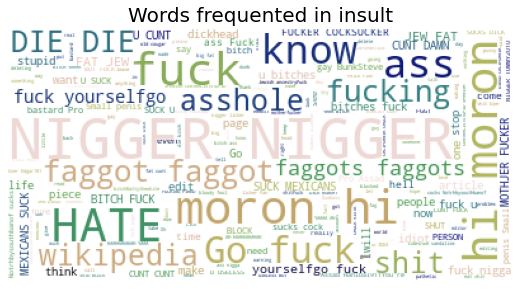

In [ ]:
wordcloud(df_ins, 'insult')

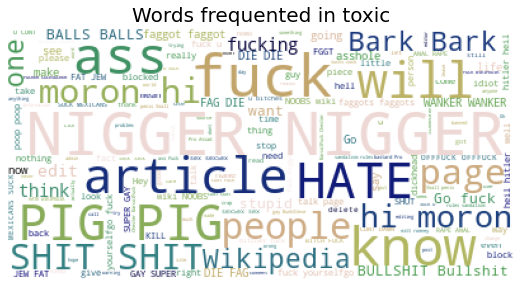

In [ ]:
wordcloud(df_tox,'toxic')

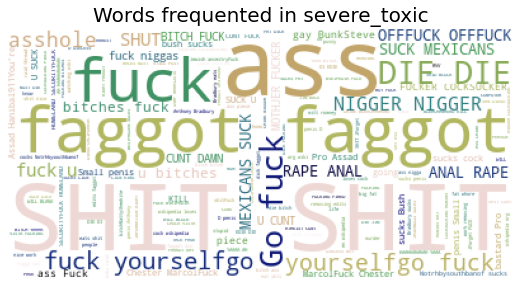

In [ ]:
wordcloud(df_sev,'severe_toxic')

In [ ]:
df_tox.head()

,id,comment_text,toxic
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0.0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0.0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0.0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0.0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0.0


In [ ]:
df_tox_1 = df_tox[df_tox['toxic'] == 1].iloc[0:5000,:]
df_tox_1.shape

(5000, 3)

In [ ]:
df_tox_0 = df_tox[df_tox['toxic'] == 0].iloc[0:5000,:]

In [ ]:
df_tox_done = pd.concat([df_tox_1, df_tox_0], axis=0)
df_tox_done.shape

(10000, 3)

In [ ]:
df_sev[df_sev['severe_toxic'] == 1].count()

id              1101
comment_text    1101
severe_toxic    1101
dtype: int64

In [ ]:
df_sev_1 = df_sev[df_sev['severe_toxic'] == 1].iloc[0:1595,:]
df_sev_0 = df_sev[df_sev['severe_toxic'] == 0].iloc[0:1595,:]
df_sev_done = pd.concat([df_sev_1, df_sev_0], axis=0)
df_sev_done.shape

(2696, 3)

Comments--> We only had 1,595 comments that are severely toxic. We combine it together with another 1,595 comments that are not toxic to form a new dataset that is balanced. We repeat this for all other categories.

In [ ]:
df_obs[df_obs['obscene'] == 1].count()

id              5913
comment_text    5913
obscene         5913
dtype: int64

In [ ]:
df_obs_1 = df_obs[df_obs['obscene'] == 1].iloc[0:5000,:]
df_obs_0 = df_obs[df_obs['obscene'] == 0].iloc[0:5000,:]
df_obs_done = pd.concat([df_obs_1, df_obs_0], axis=0)
df_obs_done.shape

(10000, 3)

In [ ]:
df_thr[df_thr['threat'] == 1].count()

id              342
comment_text    342
threat          342
dtype: int64

Comments--> The number of threat comments of 478 is too miniscule when addded with another 478 clean comments for a proper analysis. We decided that the clean comments will comprise 80% at the most of the dataset, as shown below.

In [ ]:
df_thr_1 = df_thr[df_thr['threat'] == 1].iloc[0:478,:]

# We include 1912 comments that have no threat so that the data with threat (478) will represent 20% of the dataset.
df_thr_0 = df_thr[df_thr['threat'] == 0].iloc[0:1912,:]  
df_thr_done = pd.concat([df_thr_1, df_thr_0], axis=0)
df_thr_done.shape

(2254, 3)

In [ ]:
df_ins[df_ins['insult'] == 1].count()

id              5511
comment_text    5511
insult          5511
dtype: int64

In [ ]:
df_ins_1 = df_ins[df_ins['insult'] == 1].iloc[0:5000,:]
df_ins_0 = df_ins[df_ins['insult'] == 0].iloc[0:5000,:]
df_ins_done = pd.concat([df_ins_1, df_ins_0], axis=0)
df_ins_done.shape

(10000, 3)

In [ ]:
df_ide[df_ide['identity_hate'] == 1].count()

id               954
comment_text     954
identity_hate    954
dtype: int64

In [ ]:
df_ide_1 = df_ide[df_ide['identity_hate'] == 1].iloc[0:1405,:] # 20%
df_ide_0 = df_ide[df_ide['identity_hate'] == 0].iloc[0:5620,:] # 80%
df_ide_done = pd.concat([df_ide_1, df_ide_0], axis=0)
df_ide_done.shape

(6574, 3)

Comments--> Number of comments that fall into the following categories:

- Toxic (10,000+) 
- Severe Toxic (1595)
- Obscene (8449)
- Threat (478)
- Insult (7877)
- Identity Hate (1405)

### Import relevant packages for modelling

In [ ]:
# Import packages for pre-processing, Modelling
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score, precision_recall_curve, fbeta_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

### Create simple function that takes in a dataset and allows user to choose dataset, toxicity label, vectorizer and number of ngrams

In [ ]:
def cv_tf_train_test(df_done,label,vectorizer,ngram):

    #Train/Test split
    # Split the data into X and y data sets
    X = df_done.comment_text
    y = df_done[label]

    # Split our data into training and test data 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    #Count Vectorizer/TF-IDF
    #Create a Vectorizer object and remove stopwords from the table
    cv1 = vectorizer(ngram_range=(ngram), stop_words='english')
    
    X_train_cv1 = cv1.fit_transform(X_train) # Learn the vocabulary dictionary and return term-document matrix
    X_test_cv1  = cv1.transform(X_test)      # Learn a vocabulary dictionary of all tokens in the raw documents
        
    #Initialize all model objects and fit the models on the training data
    lr = LogisticRegression()
    lr.fit(X_train_cv1, y_train)
    print('Logistic Regression Done')
    
    svm_model = LinearSVC()
    svm_model.fit(X_train_cv1, y_train)
    print('SVM Done')

    randomforest = RandomForestClassifier(n_estimators=100, random_state=42)
    randomforest.fit(X_train_cv1, y_train)
    print('Random Forest Done')
    
    # Create a list of F1 score of all models 
    f1_score_data = {'F1 Score':[f1_score(lr.predict(X_test_cv1), y_test), 
                                 f1_score(svm_model.predict(X_test_cv1), y_test),
                                 f1_score(randomforest.predict(X_test_cv1), y_test)]} 
                          
    # Create DataFrame with the model names as column labels
    df_f1 = pd.DataFrame(f1_score_data, index=['Log Regression', 'SVM', 'Random Forest'])

    return df_f1


### Let's create a TF-IDF vectorizer object for each category and calculate the F1 scores across all models

In [ ]:
df_tox_cv = cv_tf_train_test(df_tox_done, 'toxic', TfidfVectorizer, (1,1))
df_tox_cv.rename(columns={'F1 Score': 'F1 Score(toxic)'}, inplace=True)
df_tox_cv

Logistic Regression Done
SVM Done
Random Forest Done


,F1 Score(toxic)
Log Regression,0.861528
SVM,0.875293
Random Forest,0.841227


In [ ]:
df_sev_cv = cv_tf_train_test(df_sev_done, 'severe_toxic', TfidfVectorizer, (1,1))
df_sev_cv.rename(columns={'F1 Score': 'F1 Score(severe_toxic)'}, inplace=True)
df_sev_cv

Logistic Regression Done
SVM Done
Random Forest Done


,F1 Score(severe_toxic)
Log Regression,0.884984
SVM,0.908257
Random Forest,0.928358


In [ ]:
df_obs_cv = cv_tf_train_test(df_obs_done, 'obscene', TfidfVectorizer, (1,1))
df_obs_cv.rename(columns={'F1 Score': 'F1 Score(obscene)'}, inplace=True)
df_obs_cv

Logistic Regression Done
SVM Done
Random Forest Done


,F1 Score(obscene)
Log Regression,0.908097
SVM,0.921641
Random Forest,0.885491


In [ ]:
df_thr_cv = cv_tf_train_test(df_thr_done, 'threat', TfidfVectorizer, (1,1))
df_thr_cv.rename(columns={'F1 Score': 'F1 Score(threat)'}, inplace=True)
df_thr_cv

Logistic Regression Done
SVM Done
Random Forest Done


,F1 Score(threat)
Log Regression,0.411765
SVM,0.748603
Random Forest,0.678788


In [ ]:
df_ins_cv = cv_tf_train_test(df_ins_done, 'insult', TfidfVectorizer, (1,1))
df_ins_cv.rename(columns={'F1 Score': 'F1 Score(insult)'}, inplace=True)
df_ins_cv

Logistic Regression Done
SVM Done
Random Forest Done


,F1 Score(insult)
Log Regression,0.895777
SVM,0.900738
Random Forest,0.880929


In [ ]:
df_ide_cv = cv_tf_train_test(df_ide_done, 'identity_hate', TfidfVectorizer, (1,1))
df_ide_cv.rename(columns={'F1 Score': 'F1 Score(identity_hate)'}, inplace=True)
df_ide_cv

Logistic Regression Done
SVM Done
Random Forest Done


,F1 Score(identity_hate)
Log Regression,0.589286
SVM,0.730038
Random Forest,0.674699


In [ ]:
# Let's combine the dataframes into a master dataframe to compare F1 scores across all categories.
f1_all = pd.concat([df_tox_cv, df_sev_cv, df_obs_cv, df_ins_cv, df_thr_cv, df_ide_cv], axis=1)
f1_all

,F1 Score(toxic),F1 Score(severe_toxic),F1 Score(obscene),F1 Score(insult),F1 Score(threat),F1 Score(identity_hate)
Log Regression,0.861528,0.884984,0.908097,0.895777,0.411765,0.589286
SVM,0.875293,0.908257,0.921641,0.900738,0.748603,0.730038
Random Forest,0.841227,0.928358,0.885491,0.880929,0.678788,0.674699


### Transpose the combined F1 dataframe to make it suitable for presentation on a graph

In [ ]:
f1_all_trp = f1_all.transpose()
f1_all_trp

,Log Regression,SVM,Random Forest
F1 Score(toxic),0.861528,0.875293,0.841227
F1 Score(severe_toxic),0.884984,0.908257,0.928358
F1 Score(obscene),0.908097,0.921641,0.885491
F1 Score(insult),0.895777,0.900738,0.880929
F1 Score(threat),0.411765,0.748603,0.678788
F1 Score(identity_hate),0.589286,0.730038,0.674699


SVM and Random Forest models perform best (purple and brown lines seem to be the highest).

### Prediction of our model

In [ ]:
df_tox_done.head()

,id,comment_text,toxic
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1.0
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1.0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1.0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1.0
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1.0


In [ ]:
X = df_tox_done.comment_text
y = df_tox_done['toxic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initiate a Tfidf vectorizer
tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')

X_train_fit = tfv.fit_transform(X_train)  # Convert the X data into a document term matrix dataframe
X_test_fit = tfv.transform(X_test)  # Converts the X_test comments into Vectorized format

randomforest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train our Random Forest model with the X training data converted into Count Vectorized format with the Y training data
randomforest.fit(X_train_fit, y_train)
randomforest.predict(X_test_fit)

array([0., 1., 1., ..., 1., 1., 1.])

In [ ]:
# Sample Prediction
comment1 = ['You are a good human being']
comment2 = ['This is a piece of shit']

In [ ]:
comment1_vect = tfv.transform(comment1)
randomforest.predict_proba(comment1_vect)[:,1]

array([0.12233333])

In [ ]:
comment2_vect = tfv.transform(comment2)
randomforest.predict_proba(comment2_vect)[:,1]

array([1.])

Prediction Comments--> 

1) Random forest has assigned a probability of 0.1 that comment 1 ('You are a good human being') is non-toxic sentence 

2) Random forest has assigned a probability of 1.00 that comment 2 ('This is a piece of shit') is a toxic sentence